# Applying EI to TADPOLE data

In [1]:
# Import packages

import pickle 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
import copy
from src.src_utils import encode_exclude_nan, other_process, impute_per_mode, normalize_per_col
import sys
sys.path.append('src/ei_python/')

from src.ei_python.ei import EnsembleIntegration,  MeanAggregation, MedianAggregation
from src.ei_python.utils import f_minority_score
from src.src_utils import EI_model_train_and_save, fmeasure_score
from src.ei_python.interpretation import *
import pickle 
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import copy

from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, \
    matthews_corrcoef, precision_recall_fscore_support, make_scorer
import sklearn


# Import processed TADPOLE data

In [2]:
data_file_path = 'data/processed/tadpole_data_imptn_norm.pickle'
with open(data_file_path, 'rb') as file:
    tadpole_data = pickle.load(file)

label_file_path = 'data/processed/tadpole_labels_imptn_norm.pickle'
with open(label_file_path, 'rb') as file:
    tadpole_labels = pickle.load(file)

# Initialize base and meta predictors for EI

In [3]:
base_predictors = {
        'NB': GaussianNB(),
        'LR': LogisticRegression(),
        "SVM": SVC(probability=True),
        "MLP": MLPClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        "DT": DecisionTreeClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        "RF": RandomForestClassifier(),
        "XGB": XGBClassifier(n_estimators=100), 
        'KNN': KNeighborsClassifier(),
    }
meta_models = {
        'NB': GaussianNB(),
        'LR': LogisticRegression(),
        "SVM": SVC(probability=True),
        "MLP": MLPClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        "DT": DecisionTreeClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        "RF": RandomForestClassifier(),
        "XGB": XGBClassifier(), 
        'KNN': KNeighborsClassifier(),
    }

# Train EI over all and individual modaltiies

In [4]:
problem = 'mci_bl'
data_split = 'train'
sampling_strategy = 'undersampling'
save_modifier = 'undersample_test'

x = tadpole_data[problem][data_split]
y = np.array(tadpole_labels[problem][data_split].map({'MCI': 0.0, 'DEM': 1.0})).astype(int)

EI_model_train_and_save(f'{problem}_{save_modifier}',
                         mode_dict = x, base_predictors = base_predictors,
                         meta_models = meta_models,
                         y = y.astype(int), train = True,  
                         model_building=True, sampling_strategy = sampling_strategy,
                         n_samples=1)
for mode in x:
    EI_model_train_and_save(f'{problem}_{mode}_{save_modifier}',base_predictors = base_predictors,
                        meta_models = meta_models,
                        mode_dict = {mode: x[mode]}, y=y, train = True,
                        model_building=True, sampling_strategy = sampling_strategy,
                        n_samples=1)



###############################################################################################################
######################################## main_cognitive_tests modality ########################################
############################################################################################################### 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


###################################################################################################
######################################## mri_vols modality ########################################
################################################################################################### 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


##################################################################################################
######################################## csf_bio modality ########################################
################################################################################################## 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


################################################################################################
######################################## other modality ########################################
################################################################################################ 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


############################################################################################################################
######################################## MRI ROI: Volume (WM Parcellation) modality ########################################
############################################################################################################################ 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


##################################################################################################################################
######################################## MRI ROI: Volume (Cortical Parcellation) modality ########################################
################################################################################################################################## 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


################################################################################################################
######################################## MRI ROI: Surface Area modality ########################################
################################################################################################################ 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


##############################################################################################################################
######################################## MRI ROI: Cortical Thickness Average modality ########################################
############################################################################################################################## 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#########################################################################################################################################
######################################## MRI ROI: Cortical Thickness Standard Deviation modality ########################################
######################################################################################################################################### 


Training base predictors and generating data for analysis...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6783216783216783
f (majority):  0.7616580310880828
AUC:  0.8030301536763038
max MCC:  0.4843297830924571

CES...
fmax (minority):  0.6703910614525139
f (majority):  0.7806691449814127
AUC:  0.8059577907675929
max MCC:  0.4612867408132493

S.NB...
fmax (minority):  0.6810035842293907
f (majority):  0.7735368956743002
AUC:  0.8098415921614242
max MCC:  0.4790431375450281

S.LR...
fmax (minority):  0.6733466933867737
f (majority):  0.8071005917159764


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6666666666666666
f (majority):  0.7922705314009661
AUC:  0.7974508856841503
max MCC:  0.4709448661660458

CES...
fmax (minority):  0.6626984126984127
f (majority):  0.7976190476190476
AUC:  0.7938233757528562
max MCC:  0.4585754867627269

S.NB...
fmax (minority):  0.6652631578947369
f (majority):  0.817031070195627
AUC:  0.8003588080475519
max MCC:  0.4871720541931712

S.LR...
fmax (minority):  0.6734279918864098
f (majority):  0.8108108108108109
A

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6145833333333334
f (majority):  0.7109375
AUC:  0.7095626287618165
max MCC:  0.36701182627774814

CES...
fmax (minority):  0.6129597197898424
f (majority):  0.7141009055627425
AUC:  0.7240529537591057
max MCC:  0.37549181246992713

S.NB...
fmax (minority):  0.6274509803921567
f (majority):  0.6885245901639344
AUC:  0.7241022405788244
max MCC:  0.39642712588727197

S.LR...
fmax (minority):  0.6268656716417911
f (majority):  0.7524752475247524
AUC:  

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6034985422740524
f (majority):  0.5866261398176292
AUC:  0.6855993770145987
max MCC:  0.3420901215083501

CES...
fmax (minority):  0.5965417867435158
f (majority):  0.5692307692307692
AUC:  0.701312015140911
max MCC:  0.3289425613409978

S.NB...
fmax (minority):  0.6110236220472441
f (majority):  0.6516220028208745
AUC:  0.6963636184411564
max MCC:  0.35725513868736714

S.LR...
fmax (minority):  0.6074766355140186
f (majority):  0.641025641025641
A

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6208053691275168
f (majority):  0.697860962566845
AUC:  0.7424467948781137
max MCC:  0.3743256277190608

CES...
fmax (minority):  0.6149253731343284
f (majority):  0.6172106824925817
AUC:  0.736837954794129
max MCC:  0.36309796700595054

S.NB...
fmax (minority):  0.6231454005934718
f (majority):  0.6208955223880597
AUC:  0.7484006427001292
max MCC:  0.37558662391808534

S.LR...
fmax (minority):  0.6236220472440945
f (majority):  0.6629055007052186


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6343154246100521
f (majority):  0.7249022164276401
AUC:  0.7486175047068913
max MCC:  0.39638824448605103

CES...
fmax (minority):  0.6245733788395904
f (majority):  0.7097625329815302
AUC:  0.7487555078021035
max MCC:  0.38507160743767205

S.NB...
fmax (minority):  0.6382978723404256
f (majority):  0.7384615384615385
AUC:  0.7532011789407277
max MCC:  0.413435001392194

S.LR...
fmax (minority):  0.6448445171849427
f (majority):  0.7039563437926329

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.596551724137931
f (majority):  0.6937172774869109
AUC:  0.7112679527240824
max MCC:  0.3355756514012804

CES...
fmax (minority):  0.5986159169550173
f (majority):  0.6971279373368147
AUC:  0.7072362908710953
max MCC:  0.3355953446642448

S.NB...
fmax (minority):  0.6040061633281972
f (majority):  0.6302158273381295
AUC:  0.728823917907873
max MCC:  0.3442269396104858

S.LR...
fmax (minority):  0.6095551894563427
f (majority):  0.6784260515603799
AU

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.5448818897637795
f (majority):  0.5923836389280677
AUC:  0.6212603625538459
max MCC:  0.23497169646091445

CES...
fmax (minority):  0.5224586288416077
f (majority):  0.1887550200803213
AUC:  0.5870848817609194
max MCC:  0.15647217154470322

S.NB...
fmax (minority):  0.5564924114671164
f (majority):  0.6498002663115845
AUC:  0.6310684396778614
max MCC:  0.25600466214393036

S.LR...
fmax (minority):  0.5522620904836193
f (majority):  0.59174964438122

/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.6031195840554593
f (majority):  0.7014341590612777
AUC:  0.7159009137776375
max MCC:  0.3481619373096462

CES...
fmax (minority):  0.5852842809364548
f (majority):  0.6675603217158176
AUC:  0.7070391435922206
max MCC:  0.3200441386703085

S.NB...
fmax (minority):  0.5945121951219513
f (majority):  0.6133720930232559
AUC:  0.7170936548148295
max MCC:  0.3301564430162481

S.LR...
fmax (minority):  0.5862646566164154
f (majority):  0.6693440428380188


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Base predictor training is complete: see "base_summary" attribute for a summary of base predictor performance. Meta training data can be found in "meta_training_data" and "meta_test_data" attributes. Run "train_meta" method for analysis of ensemble algorithms.

Training base predictors and generating data for final ensemble...
Generating meta training data via nested cross validation...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Training base predictors on outer training sets...


/home/opc/block_vol/TADPOLE_PLATINUM/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model building: meta training data for the final model has been generated and can be found in the "meta_training_data_final" attribute. Final base predidctors have been saved in the "final_models" attribute.


#####################################################################################################
######################################## Analysing ensembles ########################################
##################################################################################################### 


Mean...
fmax (minority):  0.5625
f (majority):  0.6022727272727272
AUC:  0.6387768982818615
max MCC:  0.25101953127013277

CES...
fmax (minority):  0.5534950071326676
f (majority):  0.5132192846034215
AUC:  0.6169625518743778
max MCC:  0.22650701008438373

S.NB...
fmax (minority):  0.5531295487627366
f (majority):  0.5327245053272451
AUC:  0.6236064151724546
max MCC:  0.2401230508239235

S.LR...
fmax (minority):  0.551829268292683
f (majority):  0.5726744186046512
AUC:  0.630

# Plot cross-validation performance

In [6]:
benchmark_scores

{'Autoencoder': {'CV': {'fmax (minority)': 0.6599664991624791,
   'AUC': 0.8090431456819818,
   'f (majority)': 0.7282463186077643},
  'Test': {'f (minority)': 0.6119402985074627,
   'AUC': 0.7885338345864661,
   'f (majority)': 0.7450980392156864}},
 'XGB': {'CV': {'fmax (minority)': 0.6750448833034112,
   'AUC': 0.8132719548138437,
   'f (majority)': 0.770012706480305},
  'Test': {'f (minority)': 0.5714285714285714,
   'AUC': 0.6780231829573935,
   'f (majority)': 0.7876106194690264}}}

In [5]:
ei_exten = '_undersample_test'
EI = EnsembleIntegration.load(f'EI.mci_bl{ei_exten}')
EI.meta_summary['metrics']


Mean       CES      S.NB      S.LR     S.SVM     S.MLP  \
fmax (minority)  0.678322  0.670391  0.681004  0.673347  0.674617  0.663366   
f (majority)     0.761658  0.780669  0.773537  0.807101  0.747688  0.723577   
AUC              0.803030  0.805958  0.809842  0.815608  0.813282  0.803730   
max MCC          0.484330  0.461287  0.479043  0.486284  0.474176  0.454519   

                 S.AdaBoost      S.DT  S.GradientBoosting      S.RF     S.XGB  \
fmax (minority)    0.644660  0.556522            0.678766  0.682143  0.658228   
f (majority)       0.779252  0.769231            0.776797  0.772959  0.761062   
AUC                0.768155  0.663223            0.813632  0.821695  0.804588   
max MCC            0.409301  0.325766            0.482278  0.491119  0.451180   

                    S.KNN  
fmax (minority)  0.651163  
f (majority)     0.751592  
AUC              0.769924  
max MCC          0.436760

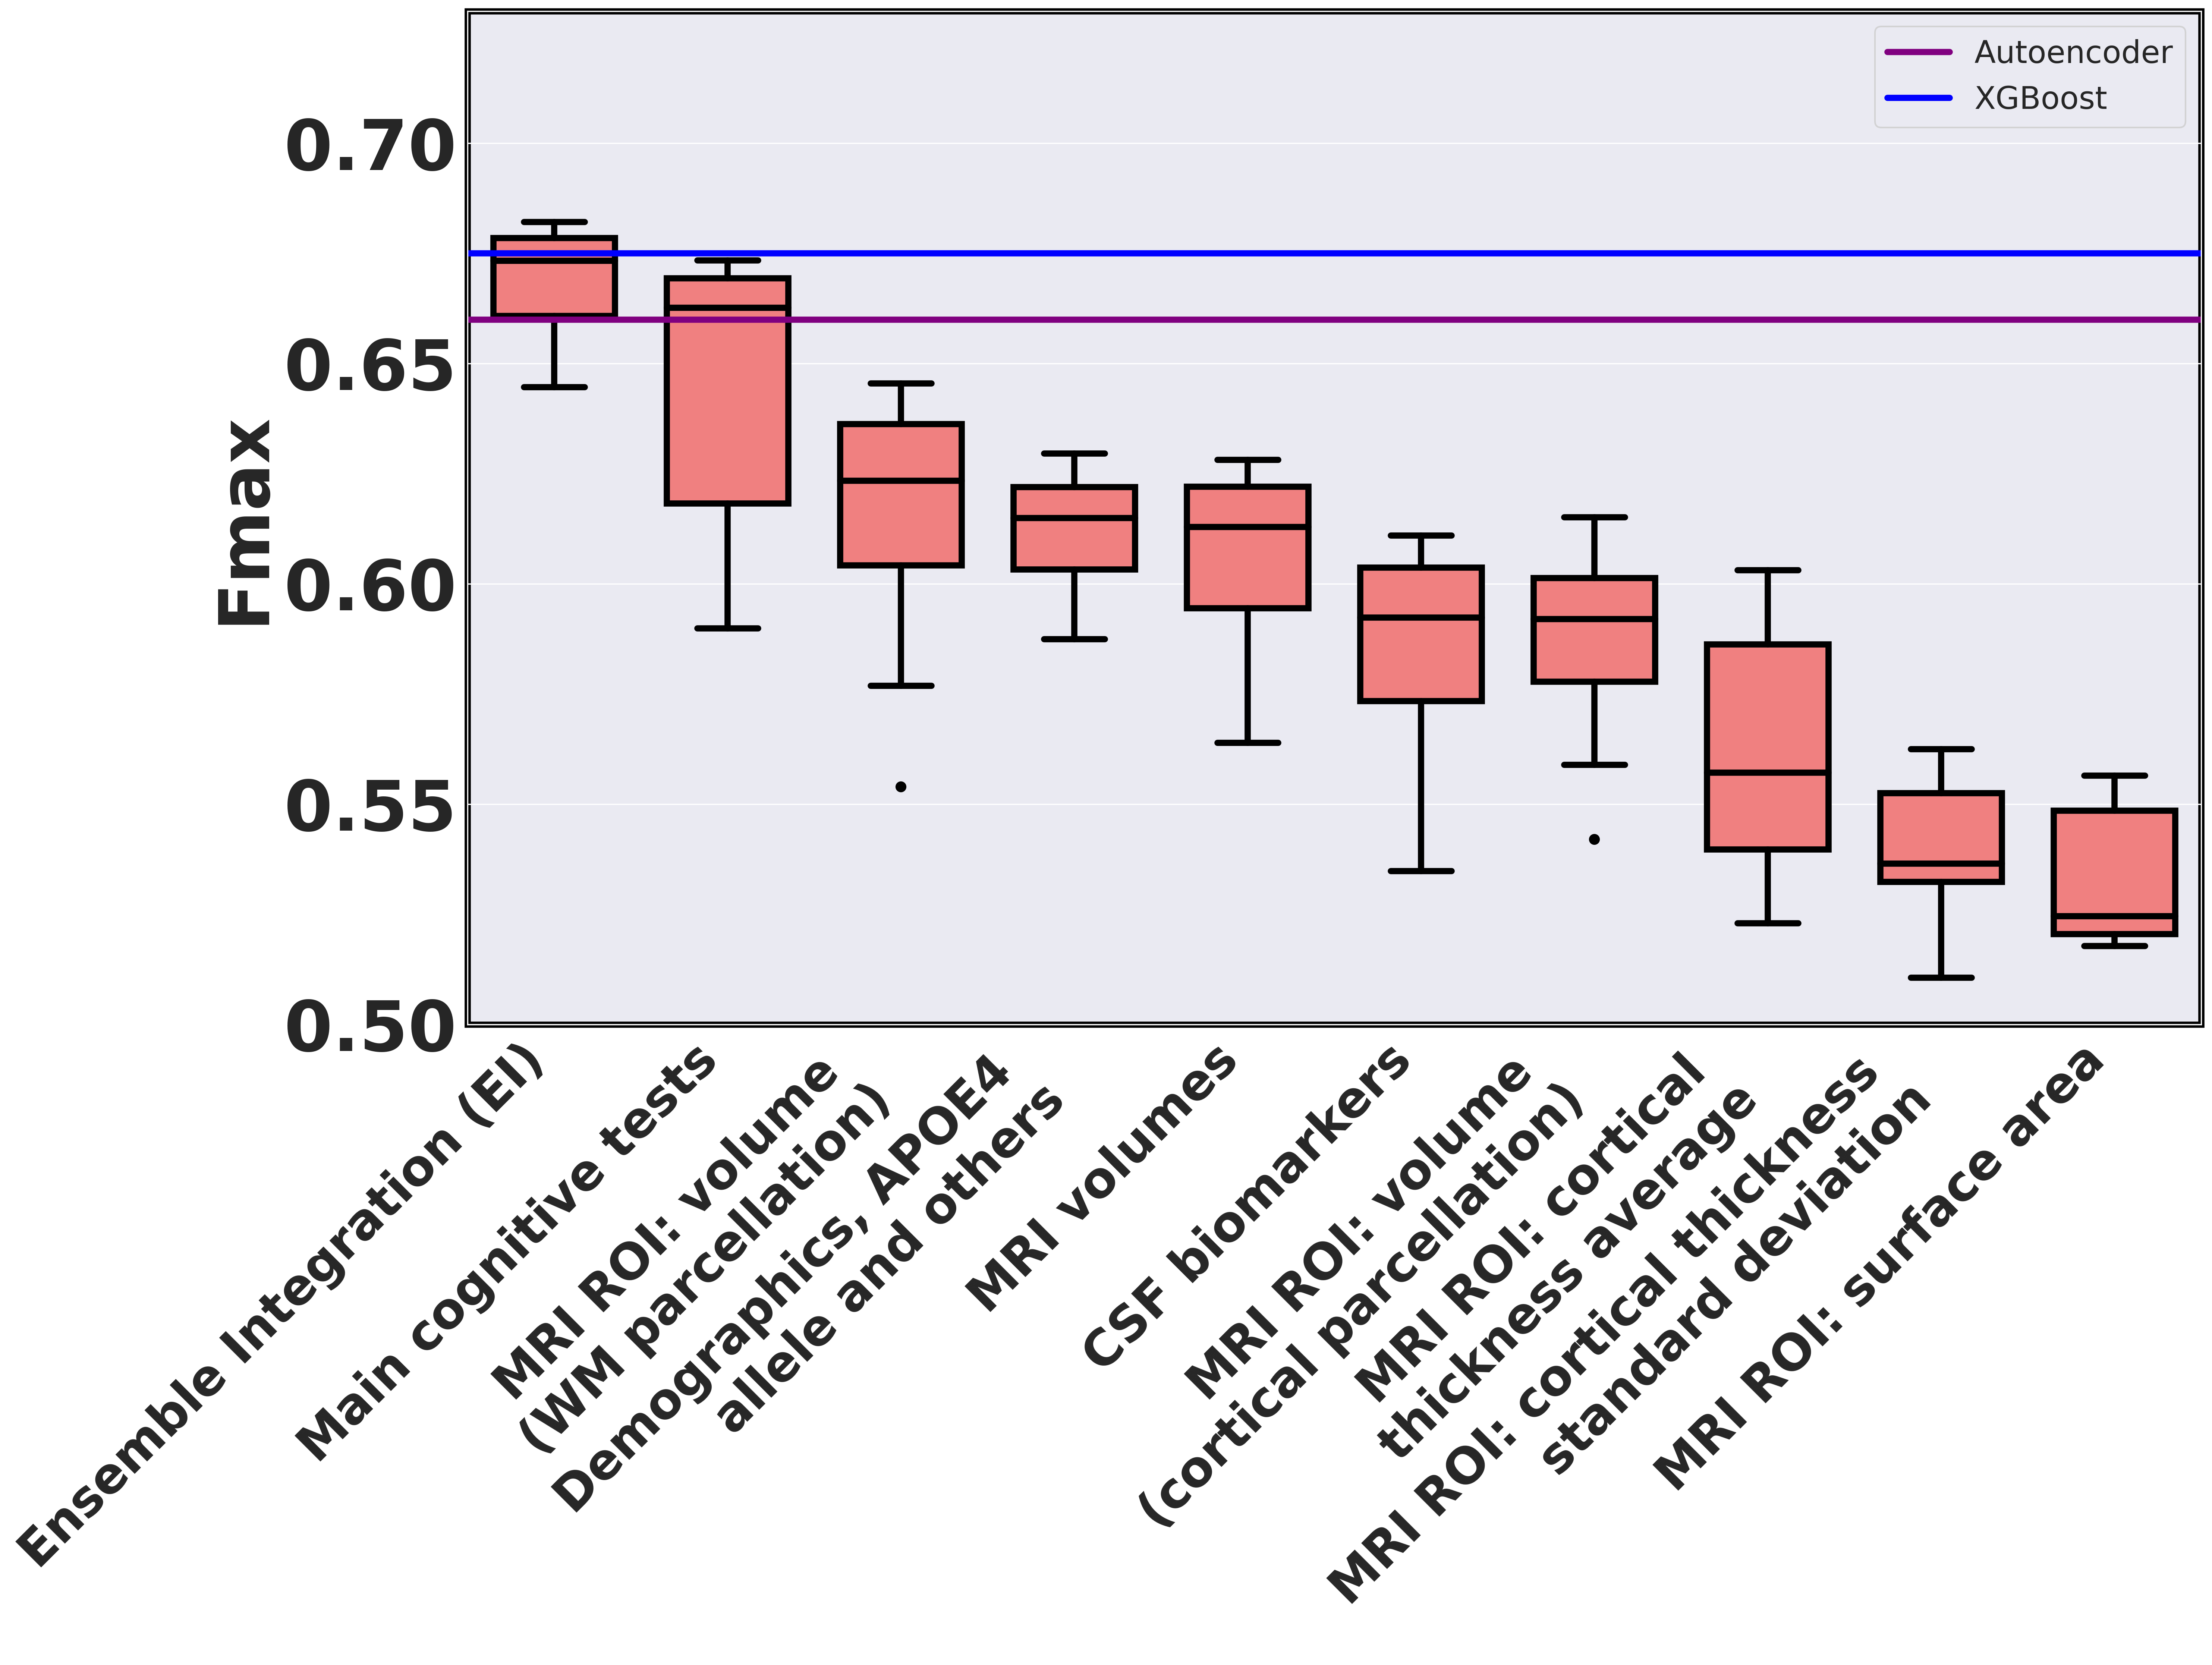

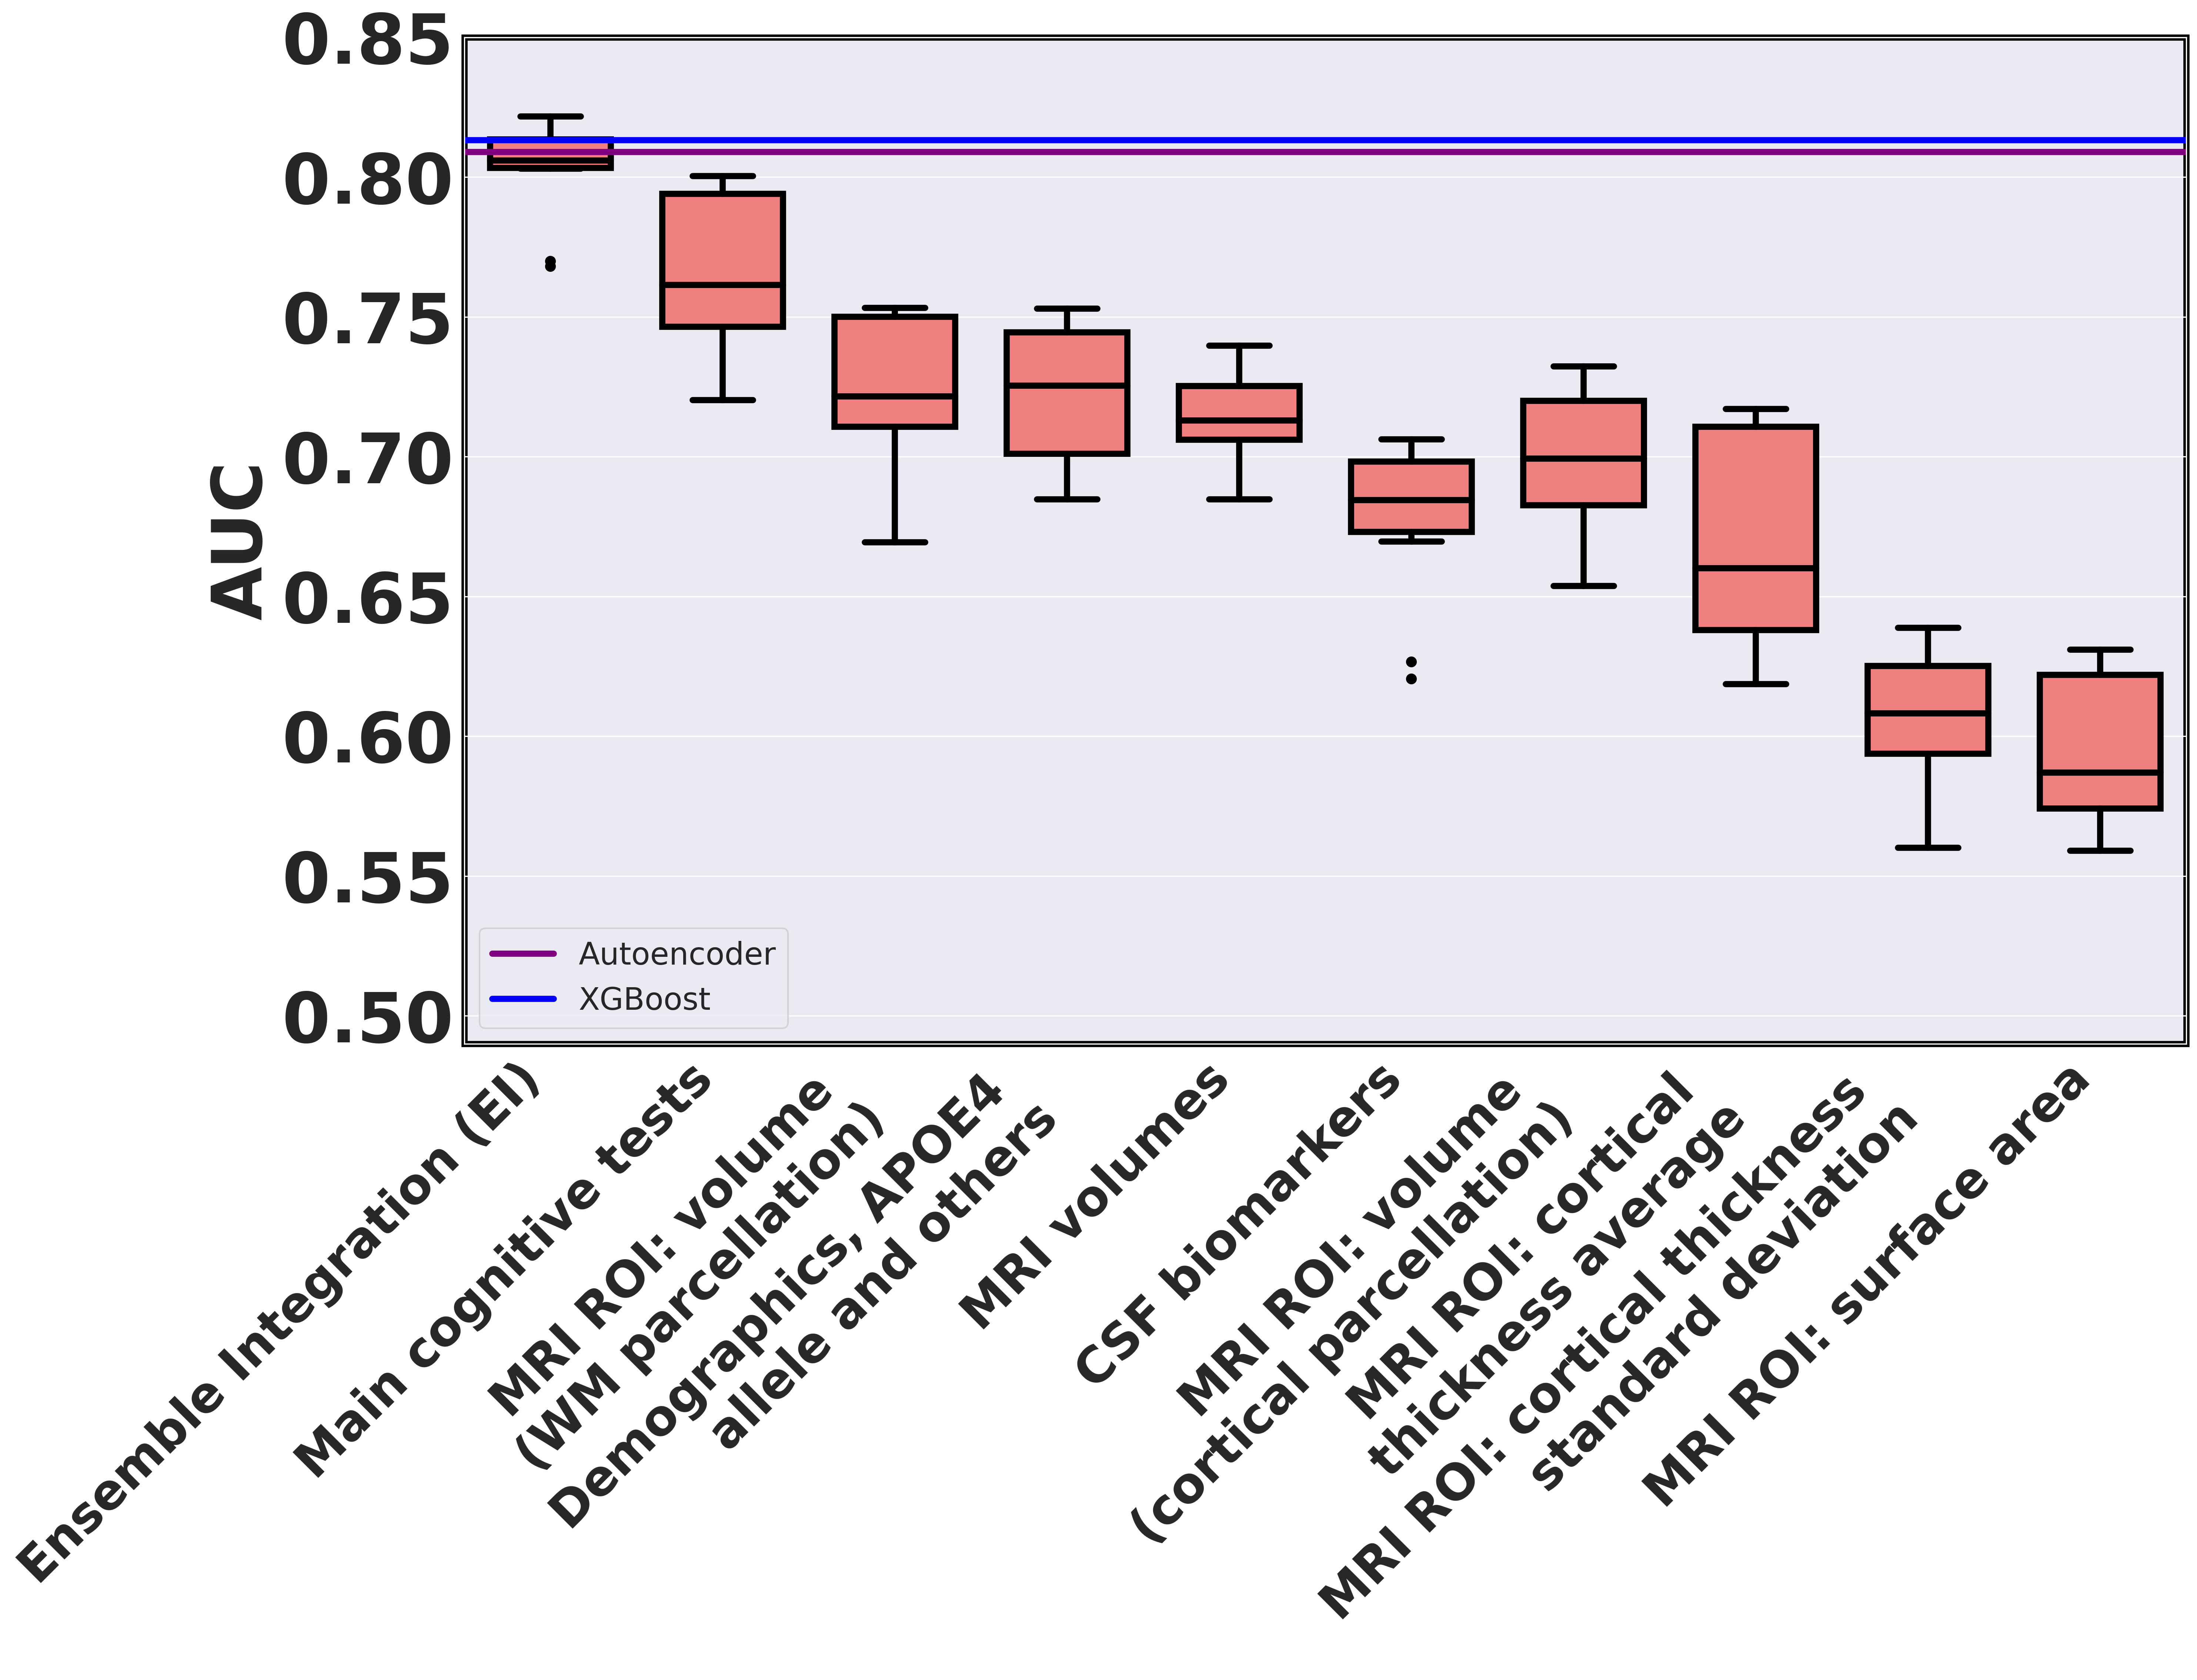

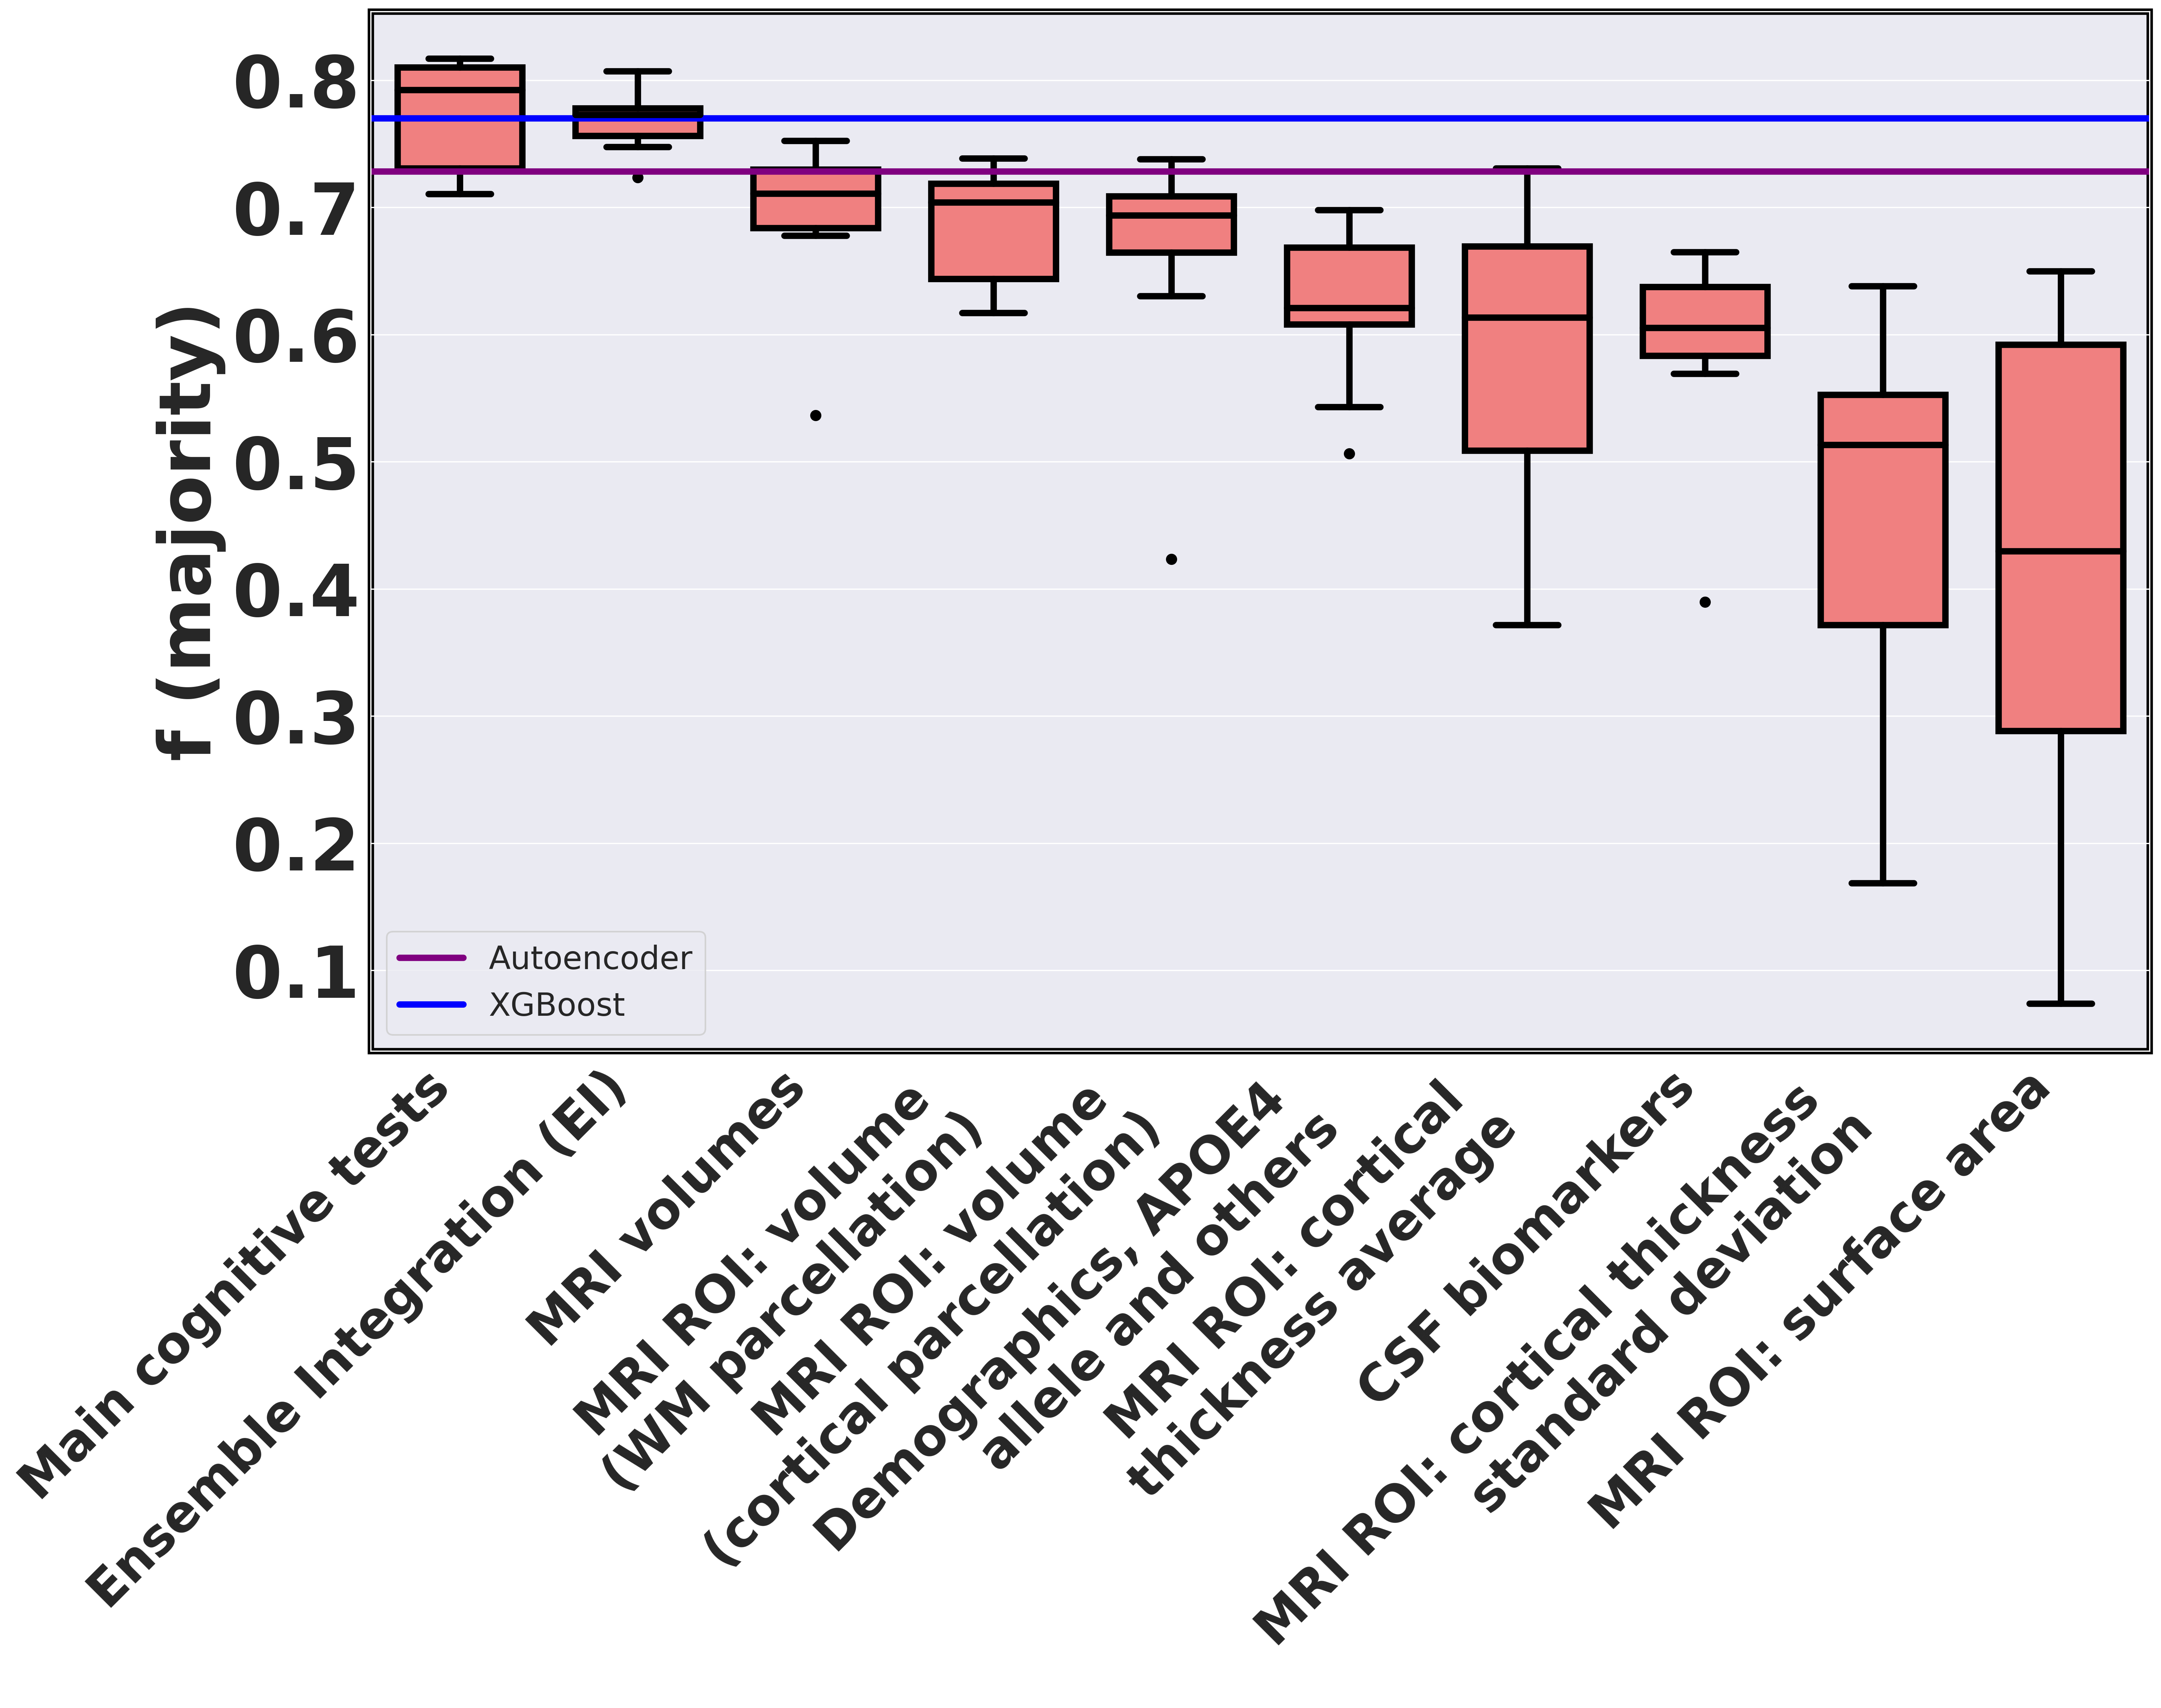

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

proper_modality_names = {'main_cognitive_tests': 'Main cognitive tests', 'all':'Ensemble Integration (EI)', 
                         'mri_vols':'MRI volumes', 'MRI ROI: Volume (WM Parcellation)':'MRI ROI: volume \n(WM parcellation)', 
                         'MRI ROI: Volume (Cortical Parcellation)':'MRI ROI: volume \n(cortical parcellation)', 
                         'other':'Demographics, APOE4 \nallele and others', 'csf_bio':'CSF biomarkers', 
                         'MRI ROI: Cortical Thickness Average':'MRI ROI: cortical \nthickness average', 
                         'MRI ROI: Cortical Thickness Standard Deviation': 'MRI ROI: cortical thickness \nstandard deviation', 
                         'MRI ROI: Surface Area': 'MRI ROI: surface area'}
fmax_order = {}
model_perf = {}

ei_exten = '_undersample_test'

#Load benchmark scores
with open('src/benchmark_scores.pkl', 'rb') as f:
    benchmark_scores = pickle.load(f)

for metric in ['fmax (minority)','AUC',  'f (majority)']:

    problem = 'mci_bl'
    data_split = 'train'
    ei_dict = {}
    ei_scores = {}
    ei_models_scores = {}
    ei_dict['all'] = EnsembleIntegration.load(f'EI.mci_bl{ei_exten}')

    ei_models_scores['all'] = ei_dict['all'].meta_summary['metrics'].T[metric]
    temp = ei_dict['all'].meta_summary['metrics'].T[metric]
    temp = temp[temp.index != 'S.DT']
    ei_scores['all'] = list(temp)

    model_perf[metric] = ei_models_scores['all']

    for mode in tadpole_data[problem][data_split]:
        ei_dict[mode] = EnsembleIntegration.load(f'EI.{problem}_{mode}{ei_exten}')
        temp = ei_dict[mode].meta_summary['metrics'].T[metric]
        temp = temp[temp.index != 'S.DT']
        ei_scores[mode] = list(temp)

    data_dict = ei_scores
    medians = [(key, statistics.median(values)) for key, values in data_dict.items()]

    if metric == 'fmax (minority)':
        sorted_medians = sorted(medians, key=lambda x: x[1], reverse=True)
    elif metric == 'f (majority)':
        sorted_medians = sorted(medians, key=lambda x: x[1], reverse=True)

    sorted_dict = {key: data_dict[key] for key, median in sorted_medians}
    named_sorted_dict = {}
    for key in sorted_dict:
        named_sorted_dict[proper_modality_names[key]] = sorted_dict[key]

    plt.rcParams['text.usetex'] = False
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(20,12), dpi=300) 

    label_fontsize = 45
    x_tick_fontsize = 32
    y_tick_fontsize = 45
    line_width = 4.0

    bp = ax.boxplot(named_sorted_dict.values(), widths=0.7, medianprops=dict(color="black", linewidth=1), showfliers=True,
                    patch_artist=True,
                    boxprops=dict(facecolor = 'lightcoral'),
                    flierprops={'markersize': 12, 'marker': '.', 'markerfacecolor':'k'})
    for element in ['boxes', 'medians', 'whiskers', 'caps']:
        for box in bp[element]:
            box.set_linewidth(line_width)
    
 
    ax.xaxis.grid(False)
    ax.set_xticklabels(named_sorted_dict.keys())
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('4')  
    plt.xticks(rotation=45, ha='right', fontsize=x_tick_fontsize, fontweight='bold')
    
    if metric == 'fmax (minority)':
        plt.ylim([0.5, 0.73])
        plt.ylabel('Fmax', fontsize=label_fontsize, fontweight='bold')
    elif metric == 'AUC':
        plt.ylabel(metric, fontsize=label_fontsize, fontweight='bold')
        plt.ylim([0.49, 0.85])
    elif metric == 'f (majority)':
        plt.ylabel(metric, fontsize=label_fontsize, fontweight='bold')
    plt.yticks(fontsize=y_tick_fontsize, fontweight='bold')
    
    plt.axhline(benchmark_scores['Autoencoder']['CV'][metric], label='Autoencoder', color='purple', linewidth=line_width)
    plt.axhline(benchmark_scores['XGB']['CV'][metric], label='XGBoost', color='blue', linewidth=line_width)

    plt.legend(fontsize=20)
    plt.show()


## Test model

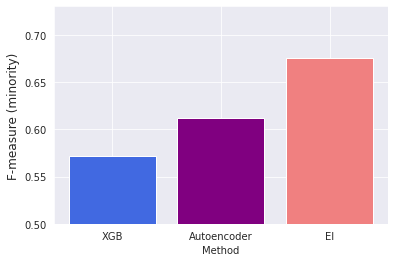

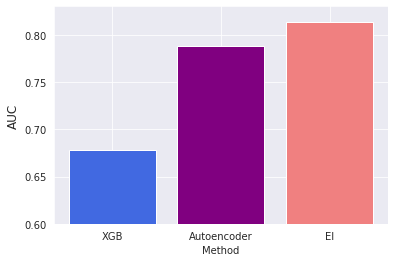

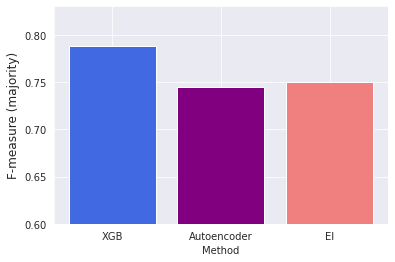

In [25]:
from sklearn.metrics import roc_auc_score

#Add EI to score dictionary to plot
benchmark_scores['EI'] = {}
benchmark_scores['EI']['Test'] = {}

for metric in ['fmax (minority)', 'AUC', 'f (majority)']:
    if metric == 'fmax (minority)':
        metric_string = 'f (minority)'
    elif metric == 'AUC':
        metric_string = 'AUC'
    elif metric == 'f (majority)':
        metric_string = 'f (majority)'

    ei_test = tadpole_data['mci_bl']['test']
    y_test = np.array(tadpole_labels['mci_bl']['test'].map({'MCI': 0.0, 'DEM': 1.0}))

    EI_model = EnsembleIntegration.load(f'EI.mci_bl{ei_exten}')
    pos = EI_model.meta_summary['metrics'].T['fmax (minority)'].argmax()
    meta_model_key = EI_model.meta_summary['metrics'].T.iloc[pos].name

    test_preds = EI_model.predict(ei_test, meta_model_key=meta_model_key)

    fmax_minor_thresh = list(EI_model.meta_summary['thresholds'][meta_model_key])[0]

    ei_metrics = {}

    if metric == 'fmax (minority)':
        benchmark_scores['EI']['Test'][metric_string] = fmeasure_score(y_test, test_preds, pos_label=1, thres = fmax_minor_thresh)['F']
    elif metric == 'AUC':
        benchmark_scores['EI']['Test'][metric_string] = roc_auc_score(y_test, test_preds)
      
    elif metric == 'f (majority)':
        benchmark_scores['EI']['Test'][metric_string] = fmeasure_score(y_test, test_preds, pos_label=0, thres = 1-fmax_minor_thresh)['F']
      
# Extracting data for plots
methods_ordered = ['XGB', 'Autoencoder', 'EI']
metrics = ['f (minority)', 'AUC', 'f (majority)']
data = {metric: [benchmark_scores[method]['Test'][metric] for method in methods_ordered] for metric in metrics}

# Creating bar plots
for metric in metrics:
    
    plt.figure()
    
    plt.bar(methods_ordered, data[metric], color=['royalblue', 'purple', 'lightcoral'])
    plt.xlabel('Method')
    plt.ylabel('Score')
    #plt.title(f'{metric} Scores by Method')

    if metric == 'f (minority)':
        plt.ylim([0.50, 0.73])
        plt.ylabel("F-measure (minority)", fontsize=12)
    if metric == 'AUC':
        plt.ylim([0.60, 0.83])
        plt.ylabel("AUC", fontsize=12)
    if metric == 'f (majority)':
        plt.ylim([0.6, 0.83])
        plt.ylabel("F-measure (majority)", fontsize=12)

    plt.show()

In [35]:
tadpole_data['mci_bl']['train']['MRI ROI: Cortical Thickness Average']

array([[0.60163205, 0.74182359, 0.68040492, ..., 0.71188341, 0.51335113,
        0.58530184],
       [0.51780415, 0.60059465, 0.33839479, ..., 0.9103139 , 0.40387183,
        0.55446194],
       [0.61275964, 0.41377602, 0.43673174, ..., 0.73542601, 0.32309746,
        0.56364829],
       ...,
       [0.68620178, 0.35480674, 0.45770065, ..., 0.4764574 , 0.21695594,
        0.59973753],
       [0.32937685, 0.61199207, 0.48083876, ..., 0.32286996, 0.43324433,
        0.45472441],
       [0.82047478, 0.70961348, 0.57772957, ..., 0.66143498, 0.54205607,
        0.74278215]])

# Interpretation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

project_name = 'mci_bl_undersample_test'
EI_object = EnsembleIntegration().load(f'EI.{project_name}')

base_predictors = EI_object.base_predictors
meta_models = EI_object.meta_models

if 'CES' in meta_models:    
    del meta_models['CES']

In [ ]:
# To maintain feature names

data_file_path = 'data/processed/tadpole_data_train_test.pickle'
with open(data_file_path, 'rb') as file:
    named_data = pickle.load(file)

interp_data = {}
for mode in named_data['mci_bl']['train']:
    if mode == 'other':
        interp_data[mode] = pd.DataFrame(tadpole_data['mci_bl']['train'][mode], columns = ['DX_bl','AGE','PTGENDER','PTEDUCAT','PTETHCAT','PTRACCAT','PTMARRY','FDG','APOE_0','APOE_1','APOE_2'])
    else:
        interp_data[mode] = pd.DataFrame(tadpole_data['mci_bl']['train'][mode], columns = named_data['mci_bl']['train'][mode].columns)

In [ ]:
# Run interpretation

problem = 'mci_bl'
data_split = 'train'
x = interp_data
y = np.array(tadpole_labels[problem][data_split].map({'MCI': 0.0, 'DEM': 1.0})).astype(int)

EI_int = EI_interpreter(EI_object=EI_object,
                        base_predictors=base_predictors,
                        meta_models=meta_models,
                        modalities=x,
                        y=y,
                        metric=f_minority_score)

EI_int.rank_product_score()
best_EI_model = EnsembleIntegration().load(f"EI.{project_name}").meta_summary['metrics'].T.sort_values(by='fmax (minority)', ascending=False)['fmax (minority)'].keys()[0]

In [ ]:
# Save interpretation of best EI model (RF)

final_int = EI_int.ensemble_feature_ranking[f"S.S.RF"]
final_int.to_csv(f'INT_{project_name}.csv')